<a href="https://www.kaggle.com/code/edrickkesuma/20th-place-solution-power-averaging-ftw?scriptVersionId=91095882" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This solution is very scuffed since I don't explain much of what I'm doing. 

**Please refer to this notebook for a better understanding of the power averaging workflow: **https://www.kaggle.com/edrickkesuma/in-depth-power-averaging-0-81848

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# The formula is Final Submission = (Submission1^Power + Submission2^Power + Submission3^Power + Submission4^Power) / 4

In [3]:
# Stack models
# 0.81826 - Stack1 from https://www.kaggle.com/vishwas21/tps-sep-21-3-level-custom-stacking
stack1_sub = pd.read_csv('../input/tps-sep-21-3-level-custom-stacking/submission.csv')
# 0.81846 - Stack2 from https://www.kaggle.com/mlanhenke/tps-09-simple-blend-stacking-xgb-lgbm-catb
stack2_sub = pd.read_csv('../input/tps-09-simple-basic-stacking-lgbm-catb-xgb/stacked_submission.csv')
# 0.81845 - Stack3 from https://www.kaggle.com/mlanhenke/tps-09-simple-blend-stacking-xgb-lgbm-catb/data
stack3_sub = pd.read_csv('../input/tps-09-simple-blend-stacking-xgb-lgbm-catb/stacked_submission.csv')
# 0.81845 - Stack4 from https://www.kaggle.com/aayush26/tps-sep-2021-simple-weighted-ensemble
stack4_sub = pd.read_csv('../input/tps-sep-2021-simple-weighted-ensemble/submission_weighted_ensemble_1.csv')
# 0.81838 - Stack 5 from https://www.kaggle.com/edrickkesuma/trying-weighted-averaging-techniques/notebook?scriptVersionId=75640105
# Correlation is abysmal (unlikely to be used)
stack5_sub = pd.read_csv('../input/my-weighted-avg-stack/submission (7).csv')

# Catboost models
# 0.81789 - Catboost from https://www.kaggle.com/jonigooner/catboost-classifier
cb1_sub = pd.read_csv('../input/catboost-classifier/catboost_classifier.csv')
# 0.81808 - Catboost voting from https://www.kaggle.com/martynovandrey/one-model-catboost-voting
cb2_sub = pd.read_csv('../input/one-model-catboost-voting/submission.csv')
# personal cb notebooks (different seed on each run)
cb3_sub = pd.read_csv('../input/cb-with-diff-seeds-voting/submission.csv')
cb4_sub = pd.read_csv('../input/cb-with-diff-seeds-voting/submission (1).csv')
cb5_sub = pd.read_csv('../input/cb-with-diff-seeds-voting/submission (2).csv')
cb6_sub = pd.read_csv('../input/cb-with-diff-seeds-voting/submission (3).csv')
cb7_sub = pd.read_csv('../input/cb-with-diff-seeds-voting/submission (4).csv')
cb8_sub = pd.read_csv('../input/cb-with-diff-seeds-voting/submission (5).csv')
cb9_sub = pd.read_csv('../input/cb-with-diff-seeds-voting/submission (6).csv')
cb10_sub = pd.read_csv('../input/cb-with-diff-seeds-voting/submission (7).csv')
cb11_sub = pd.read_csv('../input/cb-with-diff-seeds-voting/submission (8).csv')
cb12_sub = pd.read_csv('../input/cb-with-diff-seeds-voting/submission (9).csv')
cb13_sub = pd.read_csv('../input/cb-with-diff-seeds-voting/submission (10).csv')
cb14_sub = pd.read_csv('../input/cb-with-diff-seeds-voting/submission (11).csv')
cb15_sub = pd.read_csv('../input/cb-with-diff-seeds-voting/submission (12).csv')

# 0.81814 - LGBM from https://www.kaggle.com/realtimshady/single-simple-lightgbm
nlgbm1_sub = pd.read_csv('../input/lgbm-submission/submission.csv')
# models that correlate with lgbm1 
nlgbm2_sub = pd.read_csv('../input/correlate-w-lgbm1/submission.csv')
nlgbm3_sub = pd.read_csv('../input/correlate-w-lgbm1/submission (1).csv')
nlgbm4_sub = pd.read_csv('../input/correlate-w-lgbm1/submission (2).csv')
nlgbm5_sub = pd.read_csv('../input/correlate-w-lgbm1/submission (3).csv')
nlgbm6_sub = pd.read_csv('../input/correlate-w-lgbm1/submission (4).csv')
nlgbm7_sub = pd.read_csv('../input/correlate-w-lgbm1/submission (5).csv')
nlgbm8_sub = pd.read_csv('../input/correlate-w-lgbm1/submission (6).csv')
nlgbm9_sub = pd.read_csv('../input/correlate-w-lgbm1/submission (7).csv')
nlgbm10_sub = pd.read_csv('../input/correlate-w-lgbm1/submission (8).csv')


# 0.81835 - LGBM from https://www.kaggle.com/ivankontic/004-2o-lightgbm-colsample-tps-sep-2021/data
lgbm2_sub = pd.read_csv('../input/004-2o-lightgbm-colsample-tps-sep-2021/submission.csv')
# 0.81837 - https://www.kaggle.com/martynovandrey/one-model-voting-from-0-81800-to-0-81837
lgbm3_sub = pd.read_csv('../input/one-model-voting-from-0-81800-to-0-81837/submission.csv')
# 0.81830s - forked from low colsample LGBM
lgbm4_sub = pd.read_csv('../input/d/edrickkesuma/additional-runs-low-colsample-lgbm/submission.csv')
lgbm5_sub = pd.read_csv('../input/d/edrickkesuma/additional-runs-low-colsample-lgbm/submission (1).csv')
lgbm6_sub = pd.read_csv('../input/d/edrickkesuma/additional-runs-low-colsample-lgbm/submission (2).csv')
lgbm7_sub = pd.read_csv('../input/d/edrickkesuma/additional-runs-low-colsample-lgbm/submission (3).csv')
lgbm8_sub = pd.read_csv('../input/d/edrickkesuma/additional-runs-low-colsample-lgbm/submission (4).csv')
lgbm9_sub = pd.read_csv('../input/d/edrickkesuma/additional-runs-low-colsample-lgbm/submission (5).csv')
lgbm10_sub = pd.read_csv('../input/d/edrickkesuma/additional-runs-low-colsample-lgbm/submission (6).csv')
lgbm11_sub = pd.read_csv('../input/d/edrickkesuma/additional-runs-low-colsample-lgbm/submission (7).csv')
lgbm12_sub = pd.read_csv('../input/d/edrickkesuma/additional-runs-low-colsample-lgbm/submission (8).csv')
lgbm13_sub = pd.read_csv('../input/d/edrickkesuma/additional-runs-low-colsample-lgbm/submission (9).csv')
# low colsample LGBM v2
lgbm14_sub = pd.read_csv('../input/additional-runs-low-colsample-lgbm-v2/submission.csv')
lgbm15_sub = pd.read_csv('../input/additional-runs-low-colsample-lgbm-v2/submission (1).csv')
lgbm16_sub = pd.read_csv('../input/additional-runs-low-colsample-lgbm-v2/submission (2).csv')
lgbm17_sub = pd.read_csv('../input/additional-runs-low-colsample-lgbm-v2/submission (3).csv')
lgbm18_sub = pd.read_csv('../input/additional-runs-low-colsample-lgbm-v2/submission (4).csv')
lgbm19_sub = pd.read_csv('../input/additional-runs-low-colsample-lgbm-v2/submission (5).csv')
lgbm20_sub = pd.read_csv('../input/additional-runs-low-colsample-lgbm-v2/submission (6).csv')
lgbm21_sub = pd.read_csv('../input/additional-runs-low-colsample-lgbm-v2/submission (7).csv')

lgbm22_sub = pd.read_csv('../input/additional-runs-low-colsample-lgbm-v2/submission (8).csv')
lgbm23_sub = pd.read_csv('../input/additional-runs-low-colsample-lgbm-v2/submission (9).csv')
lgbm24_sub = pd.read_csv('../input/additional-runs-low-colsample-lgbm-v2/submission (10).csv')
lgbm25_sub = pd.read_csv('../input/additional-runs-low-colsample-lgbm-v2/submission (11).csv')
lgbm26_sub = pd.read_csv('../input/additional-runs-low-colsample-lgbm-v2/submission (12).csv')
lgbm27_sub = pd.read_csv('../input/additional-runs-low-colsample-lgbm-v2/submission (13).csv')
lgbm28_sub = pd.read_csv('../input/additional-runs-low-colsample-lgbm-v2/submission (14).csv')
lgbm29_sub = pd.read_csv('../input/additional-runs-low-colsample-lgbm-v2/submission (15).csv')

lgbm30_sub = pd.read_csv('../input/additional-low-colsample-lgbm-v3/submission.csv')
lgbm31_sub = pd.read_csv('../input/additional-low-colsample-lgbm-v3/submission (1).csv')
lgbm32_sub = pd.read_csv('../input/additional-low-colsample-lgbm-v3/submission (2).csv')
lgbm33_sub = pd.read_csv('../input/additional-low-colsample-lgbm-v3/submission (3).csv')
lgbm34_sub = pd.read_csv('../input/additional-low-colsample-lgbm-v3/submission (4).csv')
lgbm35_sub = pd.read_csv('../input/additional-low-colsample-lgbm-v3/submission (5).csv')
lgbm36_sub = pd.read_csv('../input/additional-low-colsample-lgbm-v3/submission (6).csv')
lgbm37_sub = pd.read_csv('../input/additional-low-colsample-lgbm-v3/submission (7).csv')
lgbm38_sub = pd.read_csv('../input/additional-low-colsample-lgbm-v3/submission (8).csv')
lgbm39_sub = pd.read_csv('../input/additional-low-colsample-lgbm-v3/submission (9).csv')
lgbm40_sub = pd.read_csv('../input/additional-low-colsample-lgbm-v3/submission (10).csv')
lgbm41_sub = pd.read_csv('../input/additional-low-colsample-lgbm-v3/submission (11).csv')
lgbm42_sub = pd.read_csv('../input/additional-low-colsample-lgbm-v3/submission (12).csv')
lgbm43_sub = pd.read_csv('../input/additional-low-colsample-lgbm-v3/submission (13).csv')
lgbm44_sub = pd.read_csv('../input/additional-low-colsample-lgbm-v3/submission (14).csv')
lgbm45_sub = pd.read_csv('../input/additional-low-colsample-lgbm-v3/submission (15).csv')
lgbm46_sub = pd.read_csv('../input/additional-low-colsample-lgbm-v3/submission (16).csv')

# Around 0.8175s - personal submissions
xgb2_sub = pd.read_csv('../input/xgboost-submission-files-for-tps-september/TPS Sept Submission')
xgb3_sub = pd.read_csv('../input/xgboost-submission-files-for-tps-september/TPS Sept Submission (1)')
xgb4_sub = pd.read_csv('../input/xgboost-submission-files-for-tps-september/TPS Sept Submission (2)')
xgb5_sub = pd.read_csv('../input/xgboost-submission-files-for-tps-september/TPS Sept Submission (3)')

# moar xgbs
xgb6_sub = pd.read_csv('../input/extra-normal-xgboost-submissions/submission.csv')
xgb7_sub = pd.read_csv('../input/extra-normal-xgboost-submissions/submission (1).csv')
xgb8_sub = pd.read_csv('../input/extra-normal-xgboost-submissions/submission (2).csv')
xgb9_sub = pd.read_csv('../input/extra-normal-xgboost-submissions/submission (3).csv')
xgb10_sub = pd.read_csv('../input/extra-normal-xgboost-submissions/submission (4).csv')
xgb11_sub = pd.read_csv('../input/extra-normal-xgboost-submissions/submission (5).csv')
xgb12_sub = pd.read_csv('../input/extra-normal-xgboost-submissions/submission (6).csv')
xgb13_sub = pd.read_csv('../input/extra-normal-xgboost-submissions/submission (7).csv')

In [4]:
list_of_subs = [stack1_sub.claim, stack2_sub.claim, stack3_sub.claim, stack4_sub.claim,
                cb1_sub.claim, cb2_sub.claim, cb3_sub.claim, cb4_sub.claim, cb5_sub.claim, 
                cb6_sub.claim, cb7_sub.claim, cb8_sub.claim,
                cb9_sub.claim, cb10_sub.claim, cb11_sub.claim, cb12_sub.claim, cb13_sub.claim, cb14_sub.claim, cb15_sub.claim,
                nlgbm1_sub.claim, 
                #nlgbm2_sub.claim, nlgbm3_sub.claim, nlgbm4_sub.claim, nlgbm5_sub.claim, nlgbm6_sub.claim, nlgbm7_sub.claim, nlgbm8_sub.claim, nlgbm9_sub.claim, nlgbm10_sub.claim,
                
                lgbm2_sub.claim, lgbm3_sub.claim, lgbm4_sub.claim, lgbm5_sub.claim,
                lgbm6_sub.claim, lgbm7_sub.claim, lgbm8_sub.claim, lgbm9_sub.claim, lgbm10_sub.claim, 
                #lgbm11_sub.claim, lgbm12_sub.claim, lgbm13_sub.claim,
                #lgbm14_sub.claim, lgbm15_sub.claim, lgbm16_sub.claim, lgbm17_sub.claim,lgbm18_sub.claim, lgbm19_sub.claim, lgbm20_sub.claim, lgbm21_sub.claim,
                #lgbm22_sub.claim, lgbm23_sub.claim, lgbm24_sub.claim, lgbm25_sub.claim, lgbm26_sub.claim, lgbm27_sub.claim, lgbm28_sub.claim, lgbm29_sub.claim,
                #sxgb1_sub.claim, sxgb2_sub.claim, sxgb3_sub.claim, sxgb4_sub.claim, sxgb5_sub.claim, sxgb6_sub.claim, sxgb7_sub.claim, sxgb8_sub.claim, sxgb9_sub.claim, sxgb10_sub.claim,
                xgb2_sub.claim, xgb3_sub.claim, xgb4_sub.claim, xgb5_sub.claim
    #xgb6_sub.claim, xgb7_sub.claim, xgb8_sub.claim, xgb9_sub.claim, xgb10_sub.claim, xgb11_sub.claim, xgb12_sub.claim, xgb13_sub.claim
               ]

In [5]:
group_labels = ['stack1', 'stack2', 'stack3', 'stack4',
                'cb1', 'cb2', 'cb3', 'cb4', 'cb5', 
                'cb6', 'cb7', 'cb8', 'cb9', 'cb10', 'cb11', 'cb12', 'cb13', 'cb14', 'cb15',
                'nlgbm1', 
                #'nlgbm2', 'nlgbm3', 'nlgbm4', 'nlgbm5', 'nlgbm6', 'nlgbm7', 'nlgbm8', 'nlgbm9', 'nlgbm10',
                'lgbm2', 'lgbm3', 'lgbm4', 'lgbm5', 
                'lgbm6', 'lgbm7', 'lgbm8', 'lgbm9', 'lgbm10', 
                #'lgbm11', 'lgbm12', 'lgbm13', 
                #'lgbm14', 'lgbm15', 'lgbm16', 'lgbm17', 'lgbm18', 'lgbm19',
                #'lgbm20', 'lgbm21', 'lgbm22', 'lgbm23', 'lgbm24', 'lgbm25', 'lgbm26', 'lgbm27', 'lgbm28', 'lgbm29',
                #'sxgb1', 'sxgb2', 'sxgb3', 'sxgb4', 'sxgb5', 'sxgb6', 'sxgb7', 'sxgb8', 'sxgb9', 'sxgb10', 
                'xgb2', 'xgb3', 'xgb4', 'xgb5'
    #'xgb6', 'xgb7', 'xgb8', 'xgb9', 'xgb10', 'xgb11', 'xgb12', 'xgb13'
               ]

In [6]:
"""import matplotlib as plt
import plotly.figure_factory as ff
import plotly.express as px

hist_data = list_of_subs
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.3, show_hist=False, show_rug=False)
fig.show()"""

'import matplotlib as plt\nimport plotly.figure_factory as ff\nimport plotly.express as px\n\nhist_data = list_of_subs\nfig = ff.create_distplot(hist_data, group_labels, bin_size=0.3, show_hist=False, show_rug=False)\nfig.show()'

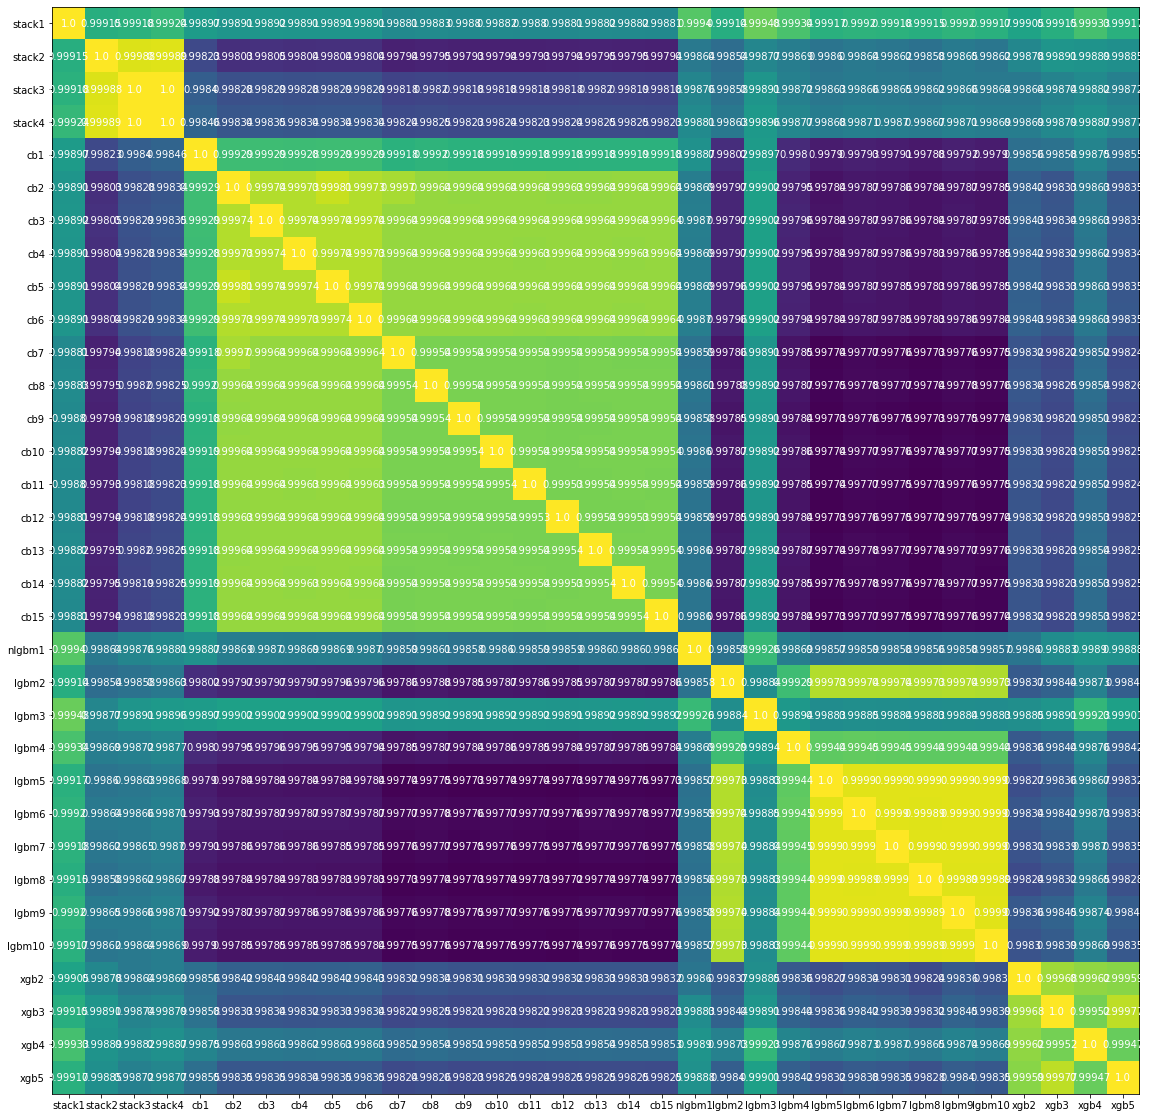

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

data = np.corrcoef(list_of_subs)

fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(data)

ax.set_xticks(np.arange(len(group_labels)))
ax.set_yticks(np.arange(len(group_labels)))

ax.set_xticklabels(group_labels)
ax.set_yticklabels(group_labels)

#plt.figure(figsize=(1,1))

#plt.savefig(bbox_inches='tight')

for i in range(len(group_labels)):
    for j in range(len(group_labels)):
        text = ax.text(j, i, data[i, j].round(5),
                       ha="center", va="center", color="w")

In [8]:
# Correlation jumping again:
# stack2, stack4, stack3, stack1, lgbm3, lgbm1, xgb4, xgb2, xgb3, xgb5, sxgbs, cb1, cb2, cb5, cb3, cb4, cb6, lgbm4, any lgbm5-10 eg lgbm13
# 0.99862^power should be around 0.9
# threshold power is roughly 76

In [9]:
"""#data = np.corrcoef([stack1_sub.claim, stack2_sub.claim, stack3_sub.claim, cb_sub.claim, lgbm_sub.claim, xgb_sub.claim])
data = np.corrcoef(list_of_subs)
fig=px.imshow(data,x=group_labels, y=group_labels)

fig.show()

# Correlation jumping: stack2, stack4, stack3, stack1, lgbm, xgb4, xgb2, xgb3, xgb5, cb 
# lowest corr between stack2 n xb 0.9982 - minimal r squared
# 0.9982^power should be around 0.9
# 0.9982^58 = 0.90078.."""

'#data = np.corrcoef([stack1_sub.claim, stack2_sub.claim, stack3_sub.claim, cb_sub.claim, lgbm_sub.claim, xgb_sub.claim])\ndata = np.corrcoef(list_of_subs)\nfig=px.imshow(data,x=group_labels, y=group_labels)\n\nfig.show()\n\n# Correlation jumping: stack2, stack4, stack3, stack1, lgbm, xgb4, xgb2, xgb3, xgb5, cb \n# lowest corr between stack2 n xb 0.9982 - minimal r squared\n# 0.9982^power should be around 0.9\n# 0.9982^58 = 0.90078..'

In [10]:
ensemble = stack1_sub.copy()
power = 60
ensemble.loc[:,'claim'] =((stack1_sub**power + nlgbm1_sub**power + lgbm3_sub**power)/3
                           #+ nlgbm2_sub**power + nlgbm3_sub**power + nlgbm4_sub**power + nlgbm5_sub**power + nlgbm6_sub**power + nlgbm7_sub**power + nlgbm8_sub**power + nlgbm9_sub**power + nlgbm10_sub**power )/12 #* 0.3
                          + (lgbm2_sub**power + lgbm4_sub**power + lgbm5_sub**power + lgbm6_sub**power + lgbm7_sub**power + lgbm8_sub**power + lgbm9_sub**power + lgbm10_sub**power + lgbm11_sub**power + lgbm12_sub**power + lgbm13_sub**power
                            + lgbm14_sub**power + lgbm15_sub**power + lgbm16_sub**power + lgbm17_sub**power + lgbm18_sub**power + lgbm19_sub**power + lgbm20_sub**power + lgbm21_sub**power
                            + lgbm22_sub**power + lgbm23_sub**power + lgbm24_sub**power + lgbm25_sub**power + lgbm26_sub**power + lgbm27_sub**power + lgbm28_sub**power + lgbm29_sub**power
                            + lgbm30_sub**power + lgbm31_sub**power + lgbm32_sub**power + lgbm33_sub**power + lgbm34_sub**power + lgbm35_sub**power + lgbm36_sub**power + lgbm37_sub**power
                            + lgbm38_sub**power + lgbm39_sub**power + lgbm40_sub**power + lgbm41_sub**power + lgbm42_sub**power
                            + lgbm43_sub**power + lgbm44_sub**power + lgbm45_sub**power + lgbm46_sub**power)/44
                          + (stack2_sub**power + stack3_sub**power + stack4_sub**power)/3 #* 0.3
                          + (cb1_sub**power + cb2_sub**power + cb3_sub**power + cb4_sub**power + cb5_sub**power + cb6_sub**power + cb7_sub**power + cb8_sub**power + cb9_sub**power + cb10_sub**power + cb11_sub**power + cb12_sub**power + cb13_sub**power + cb14_sub**power + cb15_sub**power)/15 #* 0.2
                          #+ (cb7_sub**power + cb8_sub**power + cb9_sub**power + cb10_sub**power + cb11_sub**power + cb12_sub**power + cb13_sub**power + cb14_sub**power + cb15_sub**power)
                          #+ (sxgb1_sub**power + sxgb2_sub**power + sxgb3_sub**power + sxgb4_sub**power + sxgb5_sub**power + sxgb6_sub**power + sxgb7_sub**power + sxgb8_sub**power + sxgb9_sub**power + sxgb10_sub**power)/10
                          + (xgb2_sub**power + xgb3_sub**power + xgb4_sub**power + xgb5_sub**power)/4 #* 0.2
                         )/5

In [11]:
ensemble

,id,claim
0,957919,3.903132e-16
1,957920,6.619822e-55
2,957921,8.008399e-13
3,957922,4.932835e-54
4,957923,9.219498e-48
...,...,...
493469,1451388,1.313365e-05
493470,1451389,1.609257e-56
493471,1451390,1.170648e-07
493472,1451391,3.402529e-51


In [12]:
ensemble.to_csv('submission.csv', index=False)